In [1]:
import numpy as np
import matplotlib.pyplot as plt
import trackpy as tp

from mint.utils import get_file_list
from mint.input import get_frames
from mint.denoising import filtering

In [16]:
pl, nl = get_file_list(r'/media/lumin/DATA/DATA_DEVRIM/Batch 2', extension='nd2')

In [17]:
len(pl)

381

In [38]:
id = int(np.random.rand()*len(pl))
frames = get_frames(pl[id])
frames = frames.astype(np.float64)

In [12]:
path = r'/media/lumin/DATA/DATA_DEVRIM/Batch 2/C3/Exp_47/CS2E/20231214_Exp47_CS2E_Cond03_pos4_002.nd2'
frames = get_frames(path)
frames = frames.astype(np.float64)

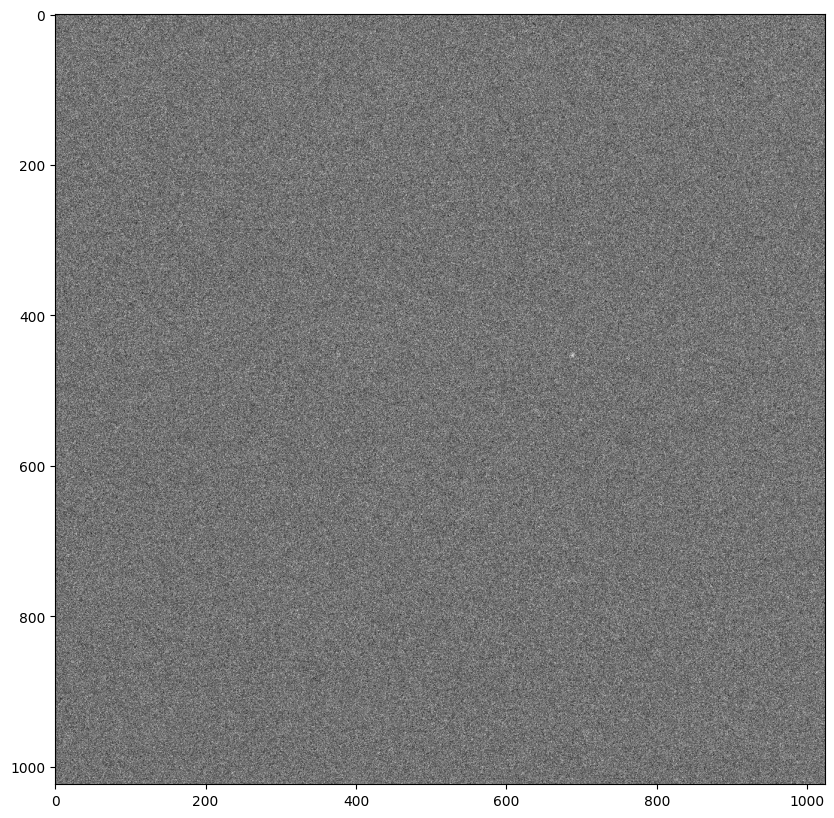

In [8]:
plt.figure(figsize=(10, 10))
plt.imshow(frames[0], cmap='gray')

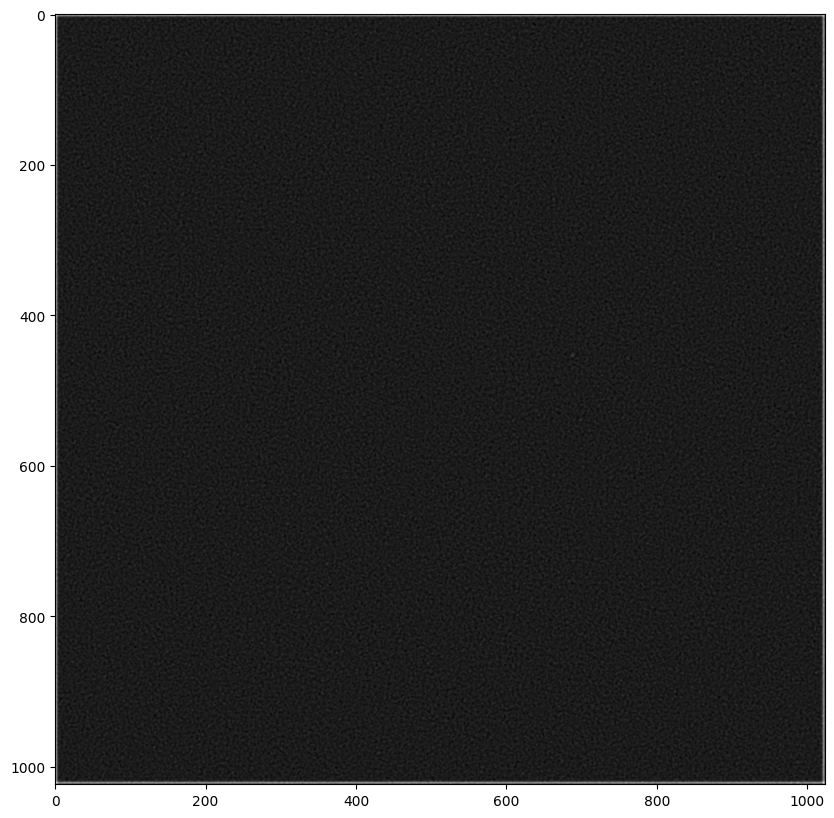

In [13]:
f_frame = filtering(frames[0:1], settings={'tophat': False, 'wavelet': True}, parameters={'separation':6})
plt.figure(figsize=(10, 10))
plt.imshow(f_frame[0], cmap='gray')

In [28]:
f_frame = frames

In [2]:
import ipywidgets as widgets

In [3]:
from IPython.display import display
w = widgets.IntSlider()
display(w)

IntSlider(value=0)

In [4]:
int_range = widgets.IntSlider()
output2 = widgets.Output()

display(int_range, output2)

def on_value_change(change):
    with output2:
        print(change['new'])

int_range.observe(on_value_change, names='value')

IntSlider(value=0)

Output()

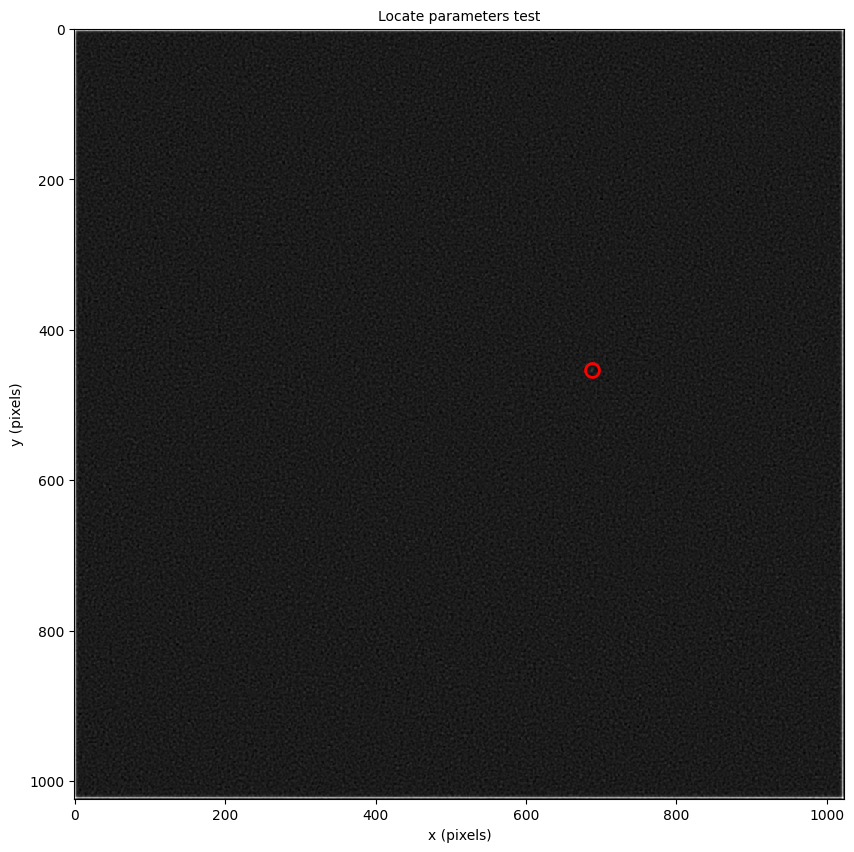

<Figure size 640x480 with 0 Axes>

In [18]:
raw_coordinates = tp.locate(f_frame[0],
                                        minmass=60,
                                        diameter=7,
                                        separation=12,
                                        preprocess=False,
                                        engine='numba')
plt.figure(figsize=(10, 10))
plt.imshow(f_frame[0])
plt.title("Locate parameters test", fontsize=10)
plt.xlabel("x (pixels)", fontsize=10)
plt.ylabel("y (pixels)", fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
tp.annotate(raw_coordinates,
            f_frame[0],
            plot_style={'markersize': 10},
            color='red')
plt.figtext(0.5, 0.01,
            f'Number of particles found :  {len(raw_coordinates)}',
            ha='center')
plt.show()